# Test Grain TimeSeries

In [1]:
print("Github Test!")

Github Test!


Imports

In [12]:
import pandas as pd
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt

Import data from Fed

In [2]:
df = pd.read_csv('PWHEAMTUSDM.csv')

Data Cleaning and EDA

In [6]:
df.dtypes

observation_date     object
PWHEAMTUSDM         float64
dtype: object

In [7]:
df['observation_date'] = pd.to_datetime(df['observation_date'])

In [10]:
df.rename({'observation_date': 'date', 'PWHEAMTUSDM': 'price'}, axis=1,inplace=True)

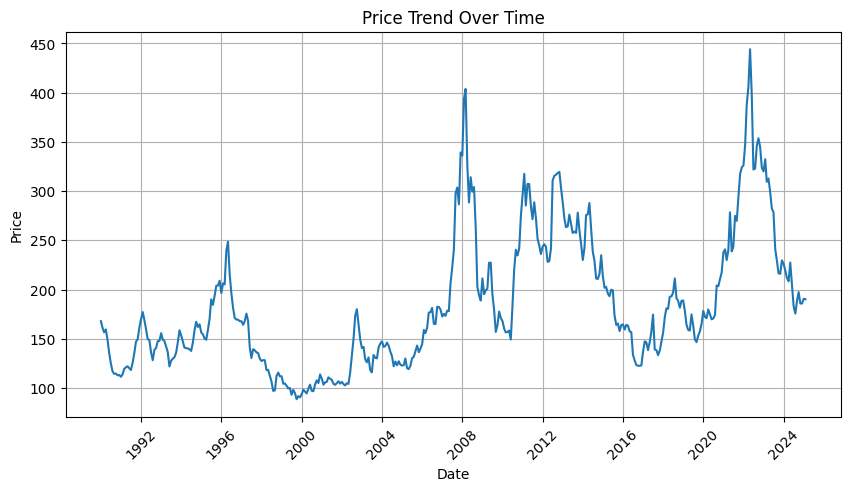

In [15]:
plt.figure(figsize=(10,5))
plt.plot(df['date'], df['price'], linestyle='-')

# Formatting
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Trend Over Time')
plt.xticks(rotation=45)
plt.grid()

# Show plot
plt.show()

In [17]:
df.describe()

,date,price
count,422,422.000000
mean,2007-07-17 06:32:25.023696640,183.791580
min,1990-01-01 00:00:00,88.552237
25%,1998-10-08 18:00:00,135.375169
50%,2007-07-16 12:00:00,165.353061
75%,2016-04-23 12:00:00,218.756687
max,2025-02-01 00:00:00,444.156568
std,NaN,67.892360


Looks good, on to ARIMA 

Test for Stationarity - Augmented Dickey-Fuller

In [ ]:
# Imports
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['price'])

# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.900045
p-value: 0.045343


p-value close to 0.05, might need to deal with stationarity later by differentiating by 1 order

ACF & PACF

In [ ]:
# Imports
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


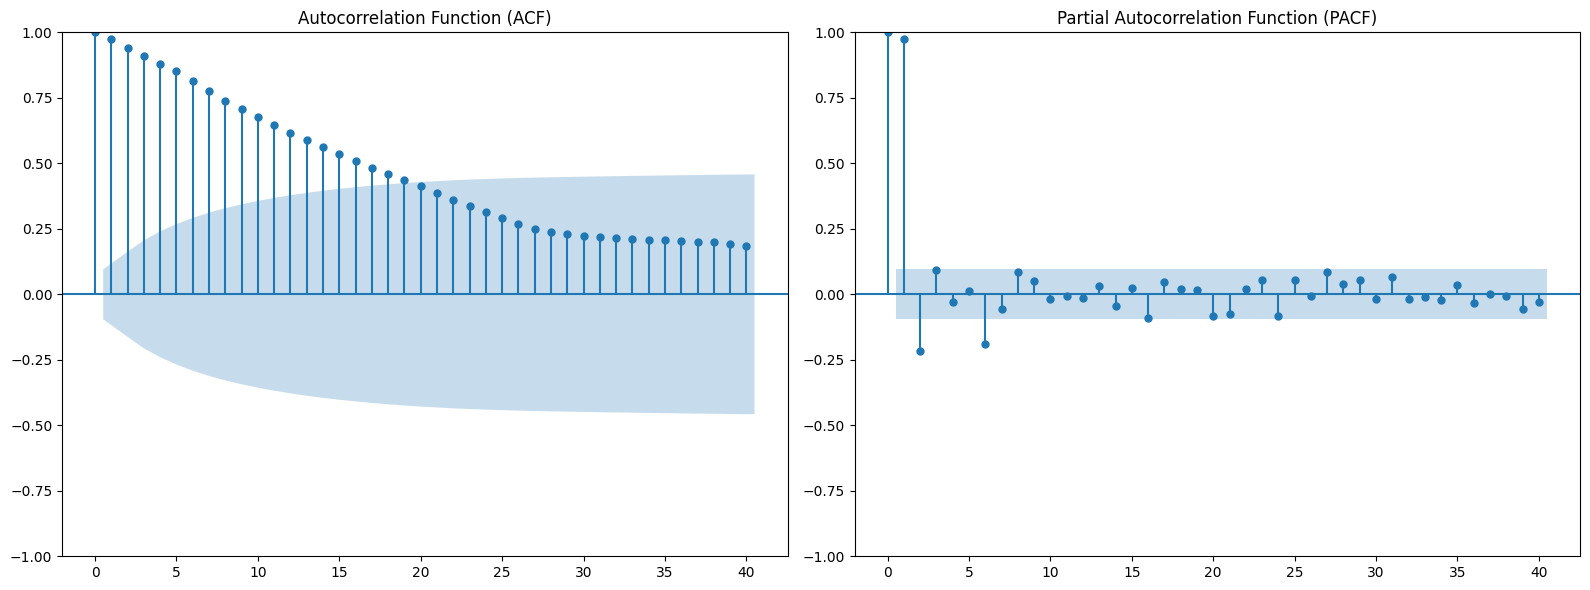

In [22]:
# Extract the 'price' column for analysis
time_series = df['price']

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Autocorrelation Function (ACF)
plot_acf(time_series, lags=40, alpha=0.05, ax=axes[0])  # Plot ACF with 40 lags
axes[0].set_title('Autocorrelation Function (ACF)')

# Partial Autocorrelation Function (PACF)
plot_pacf(time_series, lags=40, alpha=0.05, ax=axes[1], method='ywm')  # Plot PACF with 40 lags
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

Graphs suggest p = 2 & q = 0, giving us ARIMA(2,0,0)

In [23]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
# Assuming 'time_series' is your stationary data
model = ARIMA(time_series, order=(2, 0, 0))  # Replace 'd' with appropriate differencing value
results = model.fit()

# Print summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  422
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1728.091
Date:                Tue, 25 Mar 2025   AIC                           3464.181
Time:                        21:49:51   BIC                           3480.361
Sample:                             0   HQIC                          3470.575
                                - 422                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        183.7907     32.514      5.653      0.000     120.064     247.517
ar.L1          1.1847      0.035     34.148      0.000       1.117       1.253
ar.L2         -0.2158      0.034     -6.434      0.0

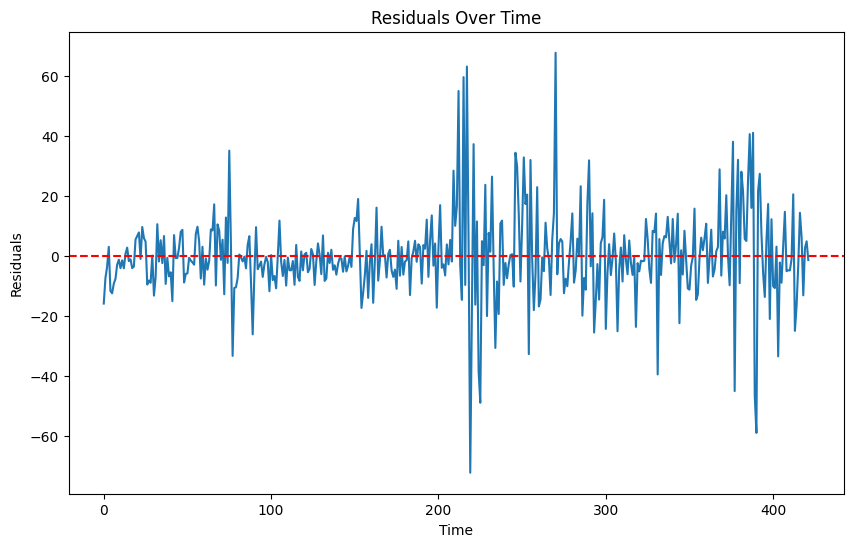

In [27]:
# Extract residuals
residuals = results.resid

# Plot residuals
plt.figure(figsize=(10,6))
plt.plot(residuals)
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.show()

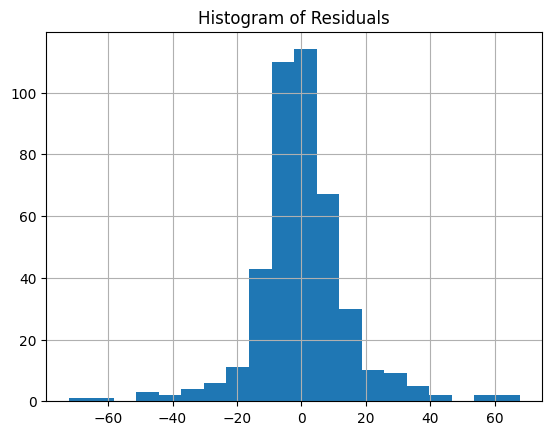

In [28]:
# Plot histogram of residuals
residuals.hist(bins=20)
plt.title('Histogram of Residuals')
plt.show()

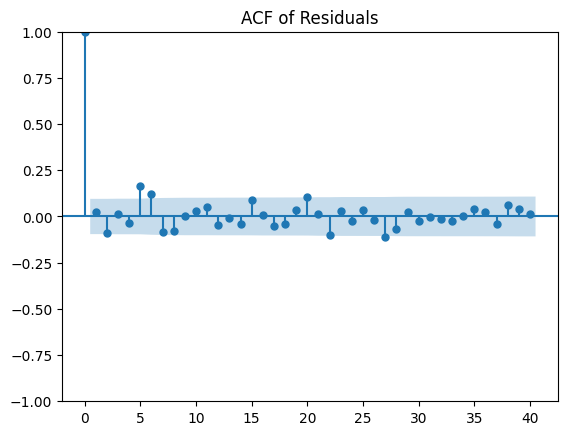

In [ ]:

# Plot ACF of residuals
plot_acf(residuals, lags=40)
plt.title('ACF of Residuals')
plt.show()

In [ ]:
# Import ljung_box
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test
ljung_box_result = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(ljung_box_result)

      lb_stat  lb_pvalue
10  28.307286   0.001612


Residuals suggest autocorrelation, need to q += 1

In [52]:
# Assuming 'time_series' is your stationary data
model = ARIMA(time_series, order=(2, 0, 1)) 
results2 = model.fit()

# Print summary
print(results2.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  422
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1725.237
Date:                Tue, 25 Mar 2025   AIC                           3460.475
Time:                        22:02:31   BIC                           3480.700
Sample:                             0   HQIC                          3468.467
                                - 422                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        183.7905     34.709      5.295      0.000     115.763     251.818
ar.L1          0.6447      0.125      5.170      0.000       0.400       0.889
ar.L2          0.3106      0.124      2.505      0.0

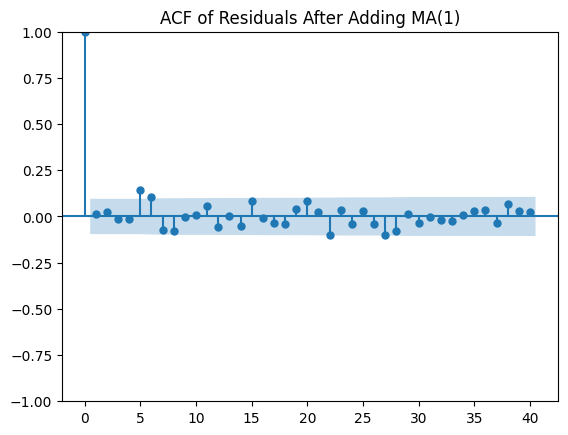

In [53]:

# Extract residuals
residuals = results2.resid

# Plot ACF of residuals
plot_acf(results2.resid, lags=40)
plt.title('ACF of Residuals After Adding MA(1)')
plt.show()


Next steps (without GenAI): 


- try hyperparameter tuning with gridsearch
- try auto ARIMA

Once best ARIMA model is found:

- train/test split 0.8 to evaluate model compared to other methods & make generalizations

- Try with daily data

- Other ML models to predict



